<a href="https://colab.research.google.com/github/nepalprabin/DeepLearning/blob/master/footballer_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
folder='messi'
file='messi_url.txt'

In [0]:
folder='neymar'
file='neymar_url.txt'

In [0]:
folder='ronaldo'
file='ronaldo_url.txt'

In [0]:
path=Path('/content/drive/My Drive/Players')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/Players/messi'),
 PosixPath('/content/drive/My Drive/Players/neymar'),
 PosixPath('/content/drive/My Drive/Players/ronaldo'),
 PosixPath('/content/drive/My Drive/Players/messi_url.txt'),
 PosixPath('/content/drive/My Drive/Players/neymar_url.txt'),
 PosixPath('/content/drive/My Drive/Players/ronaldo_url.txt'),
 PosixPath('/content/drive/My Drive/Players/models'),
 PosixPath('/content/drive/My Drive/Players/cleaned.csv')]

In [0]:
classes=['messi','neymar','ronaldo']

In [0]:
download_images(path/file,dest,max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

messi


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/messi/00000089.jpg'>
/content/drive/My Drive/Players/messi/00000097.jpg: Removing corrupt EXIF data
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/messi/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/messi/00000091.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/messi/00000181.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/messi/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/messi/00000067.jpeg'>
neymar


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/neymar/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/neymar/00000056.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/neymar/00000065.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/neymar/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/neymar/00000035.jpg'>
ronaldo


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/ronaldo/00000177.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Players/ronaldo/00000176.jpg'>


In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['messi', 'neymar', 'ronaldo']

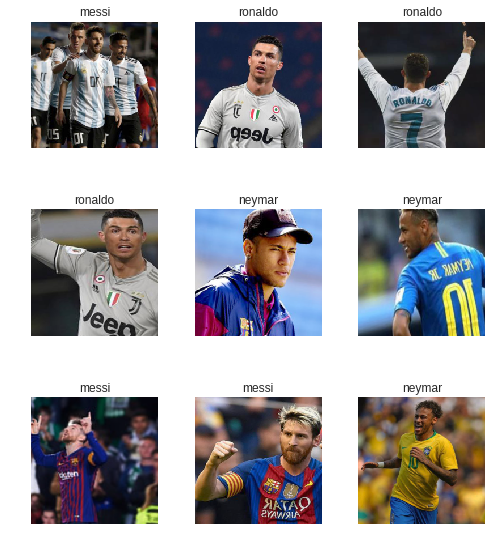

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['messi', 'neymar', 'ronaldo'], 3, 389, 97)

**Train the model**

In [0]:
learn=create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:04, 20870506.08it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.398466,0.825703,0.340206,00:12
1,1.103823,0.583662,0.237113,00:11
2,0.905567,0.485000,0.164948,00:11
3,0.786396,0.480785,0.175258,00:11


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


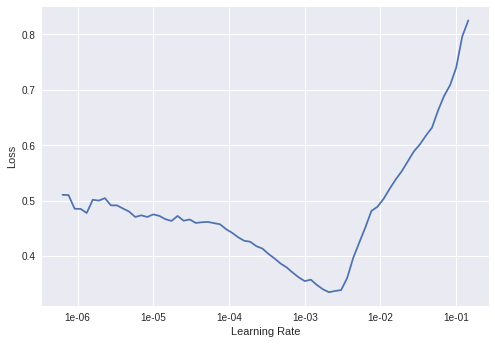

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2,max_lr=slice(0.001))

epoch,train_loss,valid_loss,error_rate,time
0,0.481192,0.447957,0.164948,00:11
1,0.409125,0.411120,0.134021,00:12


In [0]:
learn.save('stage-2')

**Interpretation**

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (389 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
messi,messi,messi,messi,messi
Path: /content/drive/My Drive/Players;

Valid: LabelList (97 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ronaldo,neymar,ronaldo,ronaldo,ronaldo
Path: /content/drive/My Drive/Players;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

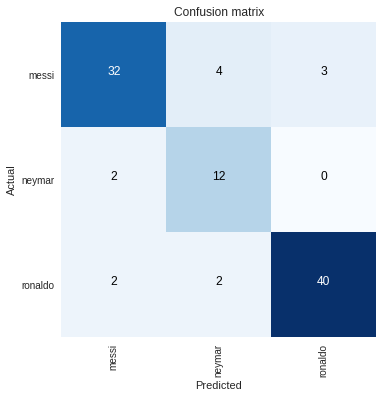

In [0]:
interp.plot_confusion_matrix()

**Cleaning Up**